# **CHAPTER 3. Functional analysis**

Import all the modules needed

In [1]:
import kegganog as kgn
import pandas as pd

Create a directory to store the data

In [1]:
! mkdir data/

Copy complete genome resords of 6 strains from `SM254` clade

In [3]:
%%bash

cp ../01_pangenome/ANI/data/NZ_CP014485.fa data/SM254.fa
cp ../01_pangenome/ANI/data/NZ_CP109142.fa data/NBC_01747.fa
cp ../01_pangenome/ANI/data/NZ_CP109224.fa data/NBC_01673.fa
cp ../01_pangenome/ANI/data/NZ_CP109235.fa data/NBC_01665.fa
cp ../01_pangenome/ANI/data/NZ_CP109294.fa data/NBC_01621.fa
cp ../01_pangenome/ANI/data/NZ_CP108647.fa data/NBC_01110.fa

Run `Snakemake` pipeline with `eggNOG-mapper` on those 6 samples

In [ ]:
! snakemake -s emap_pipeline --cores all

Create an input file for `KEGGaNOG`

In [2]:
! ls eggNOG/*/*.emapper.annotations > listFile.txt

Run `KEGGaNOG` in `multi` mode on all 6 samples

In [2]:
! KEGGaNOG -M -i listFile.txt -o kegganog_StAl --overwrite

KEGGaNOG by Ilia V. Popov
Parsing eggNOG/NBC_01110/NBC_01110.emapper.annotations...
Reading NBC_01110: 100%|██████████████████████████| 1/1 [00:00<00:00, 42.67it/s]
Formatting NBC_01110: 2it [00:00, 480.20it/s]                                   
Running KEGG-Decoder on NBC_01110...
Executing KEGG-Decoder: 100%|█████████████████████| 1/1 [00:00<00:00,  3.32it/s]
Parsing eggNOG/NBC_01621/NBC_01621.emapper.annotations...
Reading NBC_01621: 100%|██████████████████████████| 1/1 [00:00<00:00, 66.76it/s]
Formatting NBC_01621: 2it [00:00, 1168.17it/s]                                  
Running KEGG-Decoder on NBC_01621...
Executing KEGG-Decoder: 100%|█████████████████████| 1/1 [00:00<00:00,  3.48it/s]
Parsing eggNOG/NBC_01665/NBC_01665.emapper.annotations...
Reading NBC_01665: 100%|██████████████████████████| 1/1 [00:00<00:00, 66.33it/s]
Formatting NBC_01665: 2it [00:00, 1229.46it/s]                                  
Running KEGG-Decoder on NBC_01665...
Executing KEGG-Decoder: 100%|████████████

Run `KEGGaNOG` in `single` mode just on `SM254` strain

In [4]:
! KEGGaNOG -i eggNOG/SM254/SM254.emapper.annotations -o kegganog_sm245 --overwrite

KEGGaNOG by Ilia V. Popov
Saving plot: 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]
Figure(2000x2000)
Heatmap saved in kegganog_sm245/heatmap_figure.png


Create a directory to store the figures

In [9]:
! mkdir imgs/

Create a barplot of `SM254` strain complete functional profile using `KEGGaNOG`'s `barplot` API

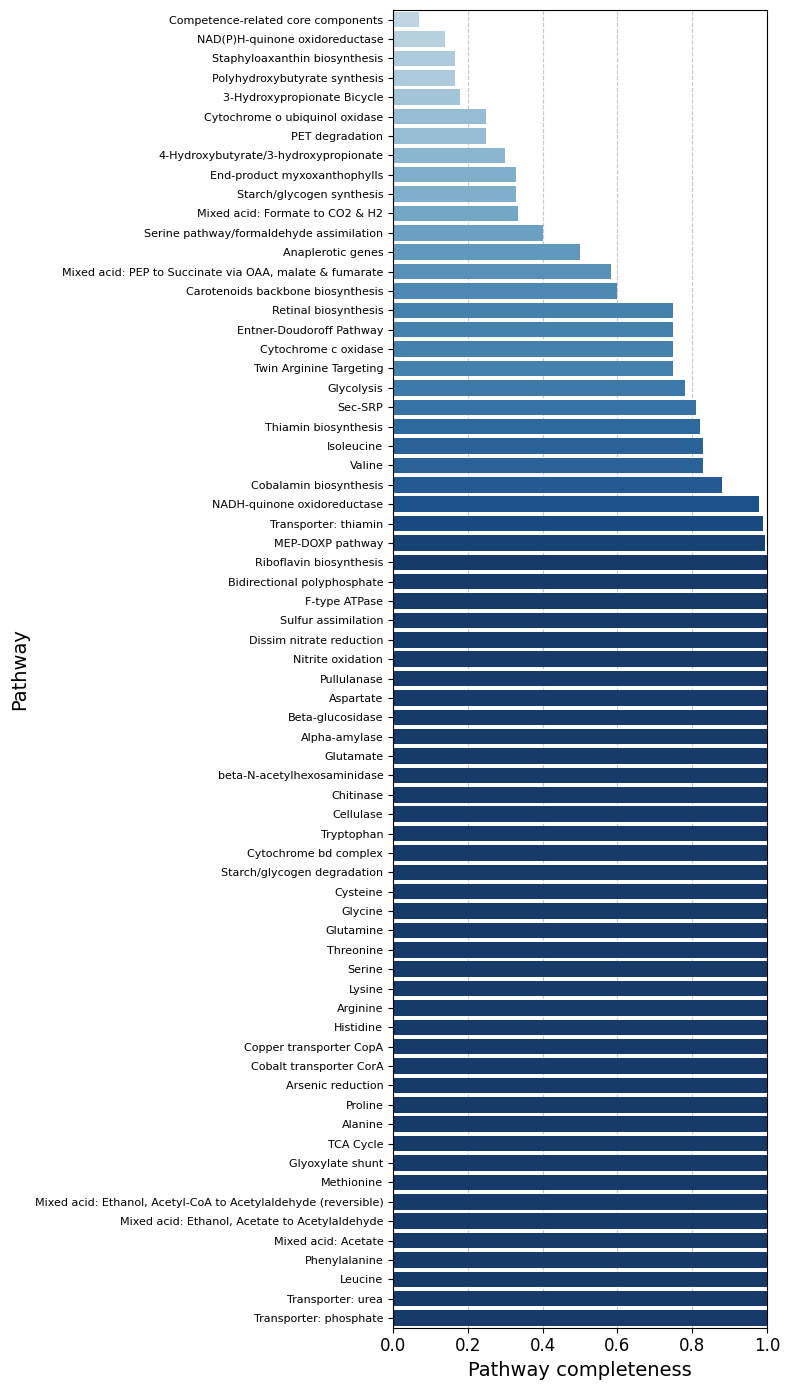

In [12]:
df = pd.read_csv("kegganog_sm245/SAMPLE_pathways.tsv", sep="\t")

kgnbar = kgn.barplot(df,
    figsize = (8, 14),
    sort_order="descending",
    yticks_fontsize = 8, 
    cmap = "Blues",
)

kgnbar.savefig("imgs/SM254_bar.png", dpi=600)
kgnbar.plotfig()

Create a correlation network of 6 samples using `KEGGaNOG`'s `correlation_network` API

Correlation matrix saved as correlation_network.tsv


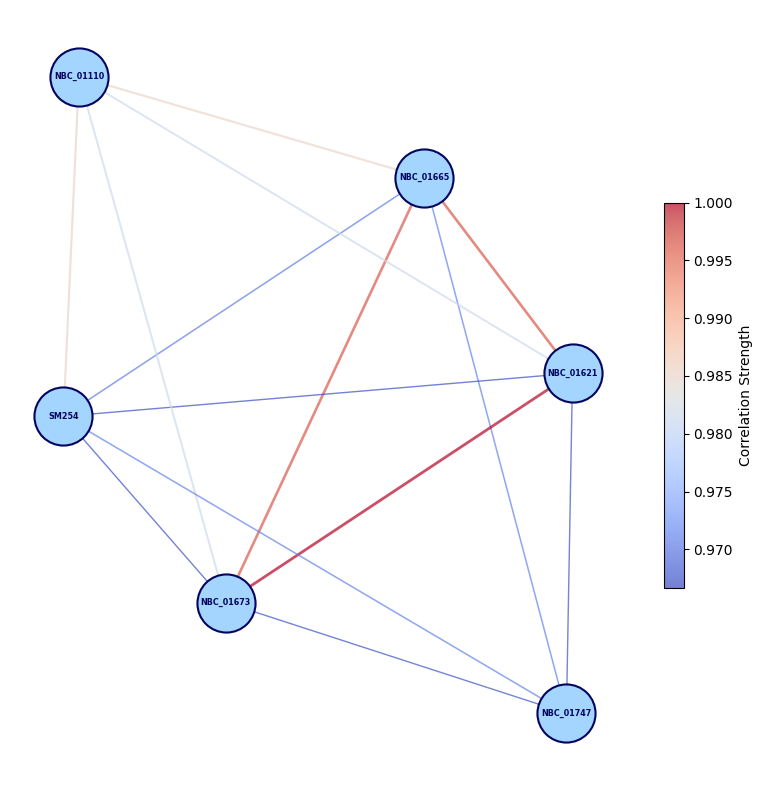

In [2]:
df = pd.read_csv("kegganog_StAl/merged_pathways.tsv", sep="\t")

kgnnet = kgn.correlation_network(
    df,
    threshold = 0.96,
    node_size=1750,
    label_fontsize=5.75,
    label_weight= 'bold',
    save_matrix="correlation_network.tsv",
    figsize=(8,8)
)

kgnnet.savefig("imgs/StAl_net.png", dpi=600)
kgnnet.plotfig()

Create a radarplot of 3 functions across 6 samples using `KEGGaNOG`'s `radarplot` API

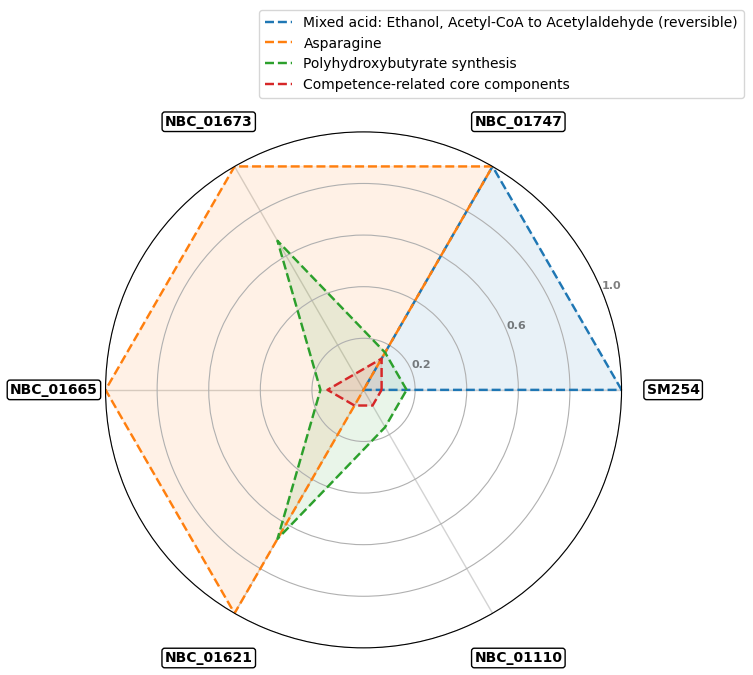

In [17]:
# List of pathways to visualize
pathways = ["Mixed acid: Ethanol, Acetyl-CoA to Acetylaldehyde (reversible)",
            "Asparagine",
            "Polyhydroxybutyrate synthesis",
            "Competence-related core components"]

# Order of samples on radar plot
sample_order = ["SM254", "NBC_01747", "NBC_01673", "NBC_01665", "NBC_01621", "NBC_01110"]


kgnradar = kgn.radarplot(
    df,
    pathways=pathways,
    sample_order=sample_order,
    label_weight="bold",
    label_background="white",
    label_edgecolor="black",
    label_pad=1.2,
    #colors=["#1f77b4"],
    yticklabels=["0.2", "", "0.6", "", "1.0"],
    ytick_weight = "bold",
    fill_alpha=0.1,
    figsize=(8,20),
    line_style = "--",
    # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    line_width = 1.75,
    legend_bbox=(1.25,1.25)
)

kgnradar.savefig("imgs/StAl_radar.png", dpi=600)
kgnradar.plotfig()

Edit a multi sample heatmap using `KEGGaNOG`'s `heatmap` API

/Volumes/SAMSUNG_SSD/Documents/miniconda3/conda_envs/kegganog/lib/python3.12/site-packages/kegganog/kgnplot/base.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


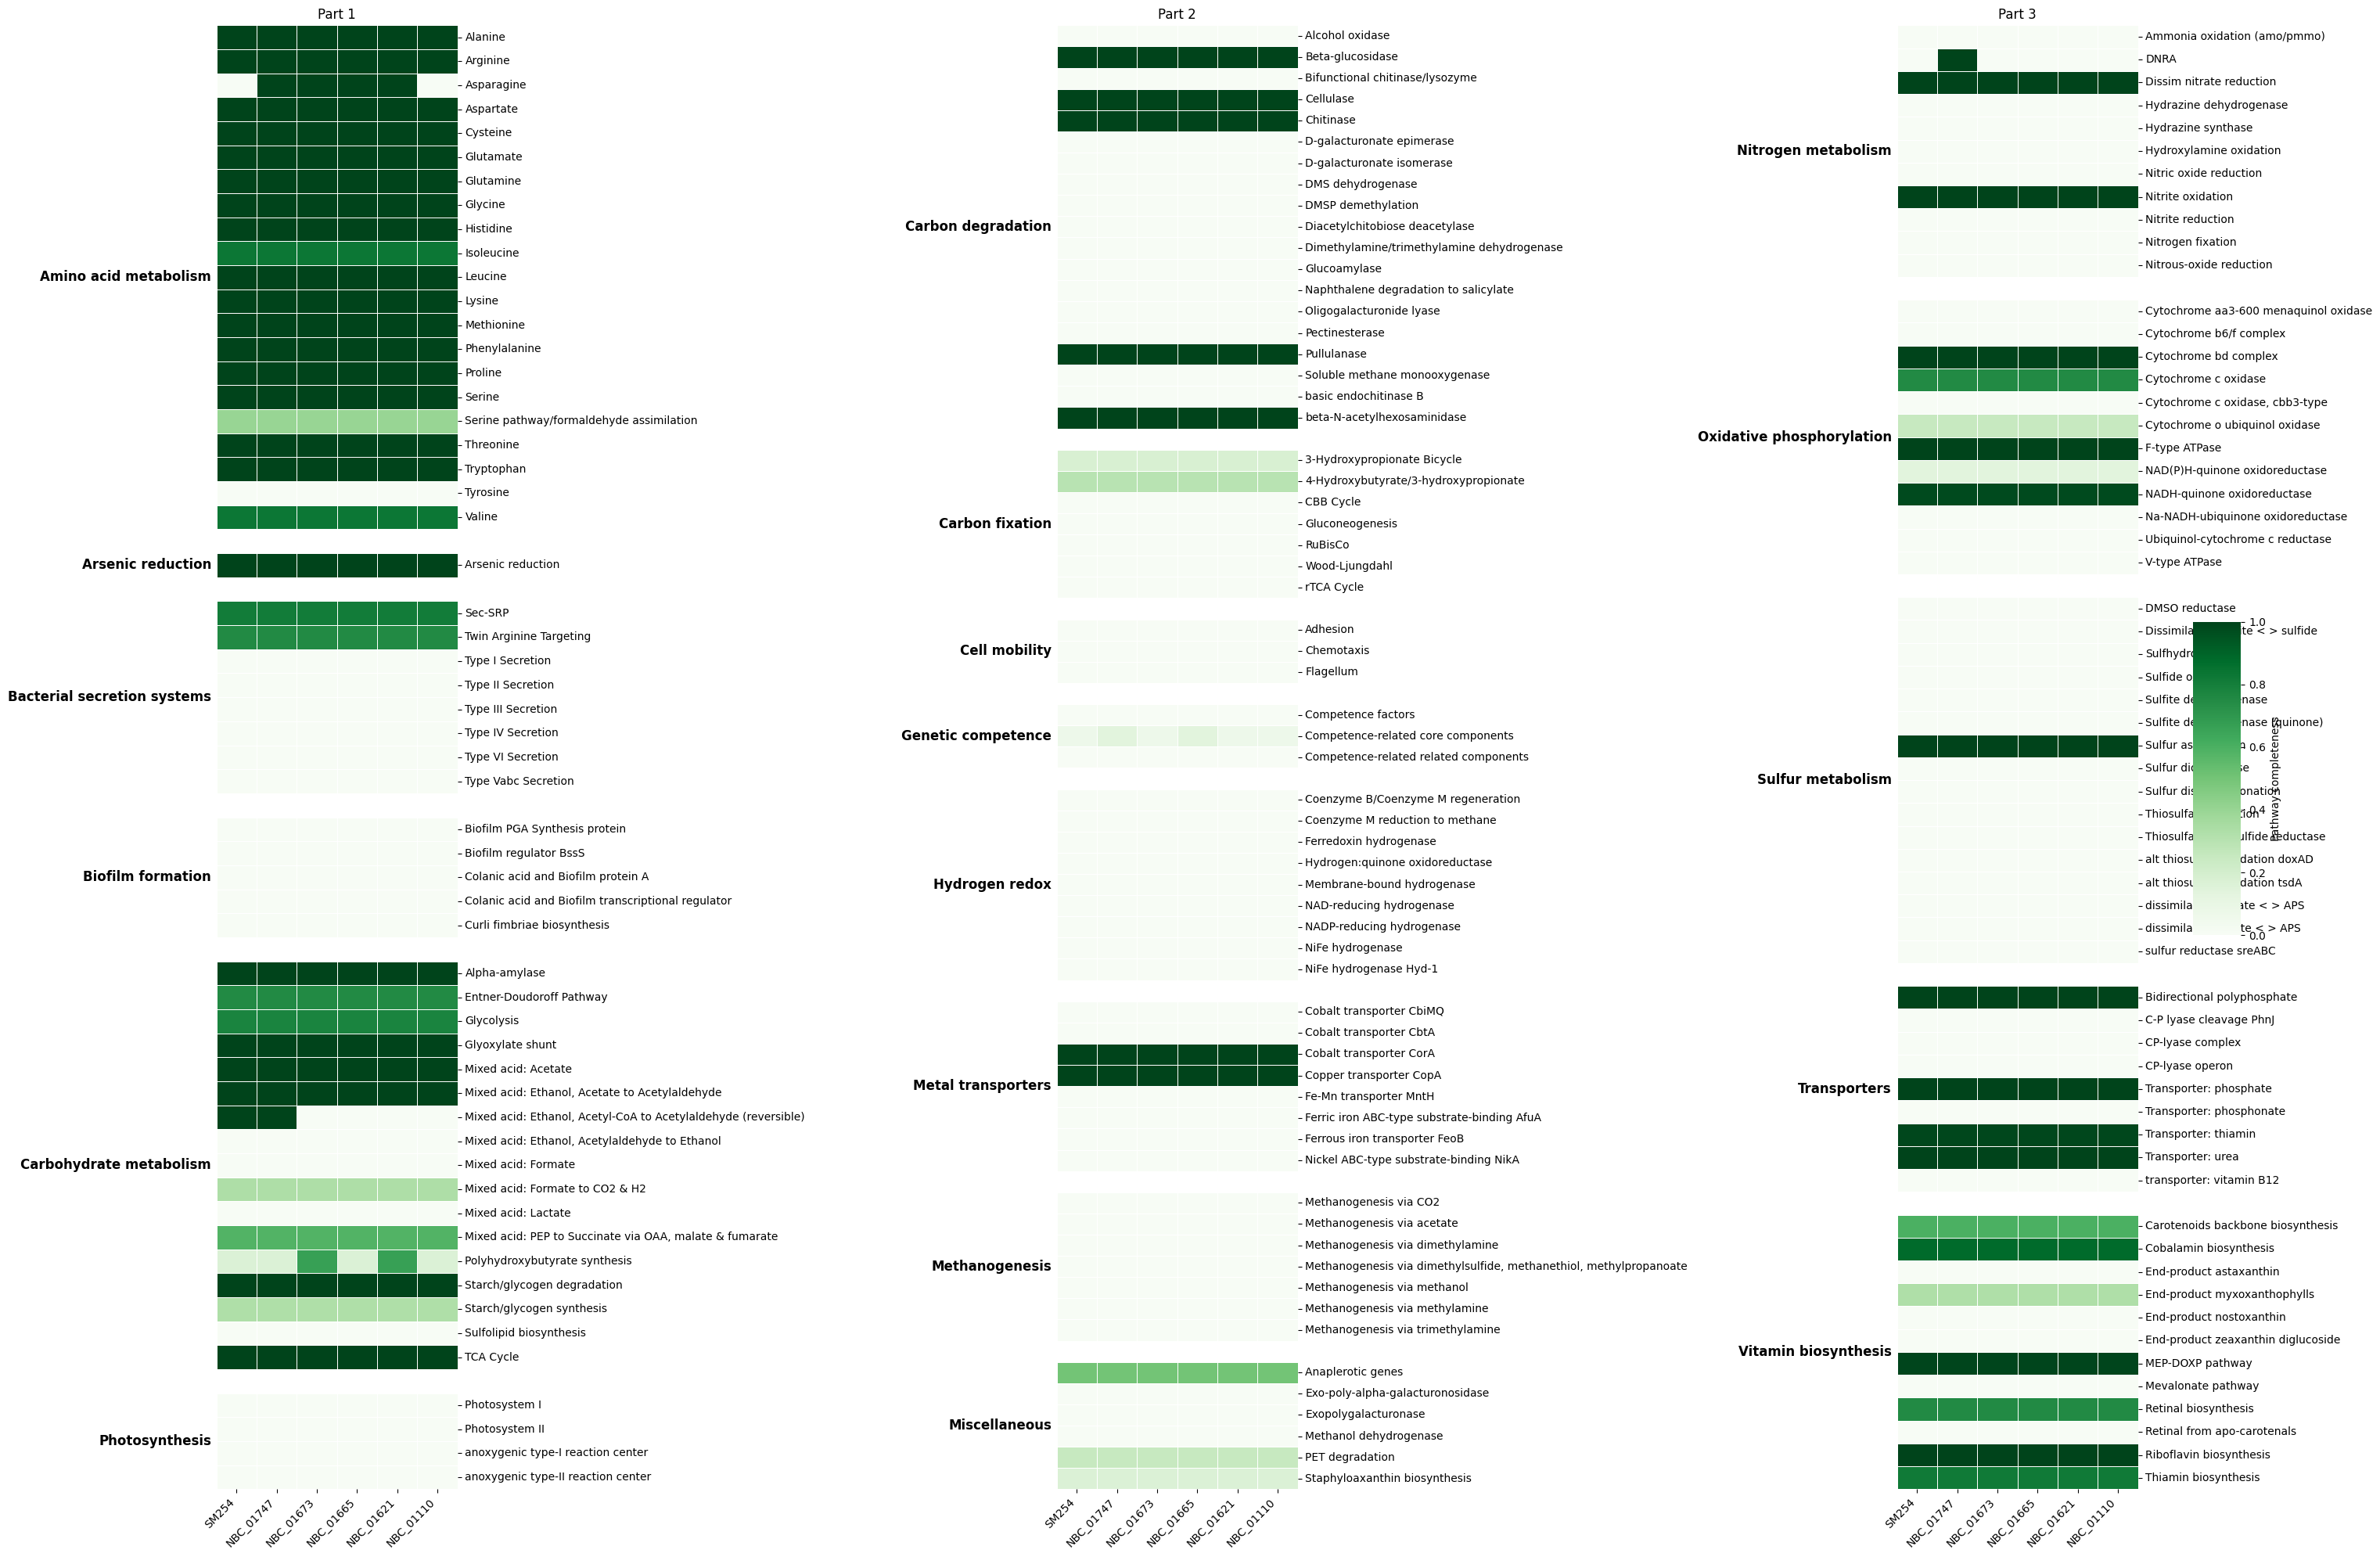

In [5]:
df = df[["Function", "SM254", "NBC_01747", "NBC_01673", "NBC_01665", "NBC_01621", "NBC_01110"]]

kgnheat = kgn.heatmap(
    df,
    color="Greens",
    group=True,
)

kgnheat.savefig("imgs/StAl_heat.png", dpi=600)
kgnheat.plotfig()

That's all!